### EXP1 Results for 1000 images for 3 epochs 

In [87]:
import os
import pandas as pd

csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv'
]

all_data = pd.concat([pd.read_csv(f).assign(task=os.path.basename(f).replace('_results.csv', '')) for f in csv_files if os.path.exists(f)], ignore_index=True)
final_summary = all_data.query("run == 'average'")[['task', 'model_name', 'mlae', 'std', 'confidence']].round(3)
final_summary = final_summary.sort_values(by=['task', 'mlae'])

In [95]:
# Filter for CustomLLaMA only
custom_llama_summary = final_summary[final_summary['model_name'] == 'CustomLLaMA'][['task', 'mlae']]

# Create a DataFrame to store the summary and sort by task alphabetically
custom_llama_df = pd.DataFrame(custom_llama_summary).sort_values(by='task')

# Display the DataFrame
custom_llama_df


,task,mlae
681,angle,2.798
836,area,9.355
1146,curvature,-2.941
61,direction,7.122
216,length,1.910
371,position_common_scale,2.456
526,position_non_aligned_scale,2.178
991,volume,11.044


### Comparison of models based on MLAE

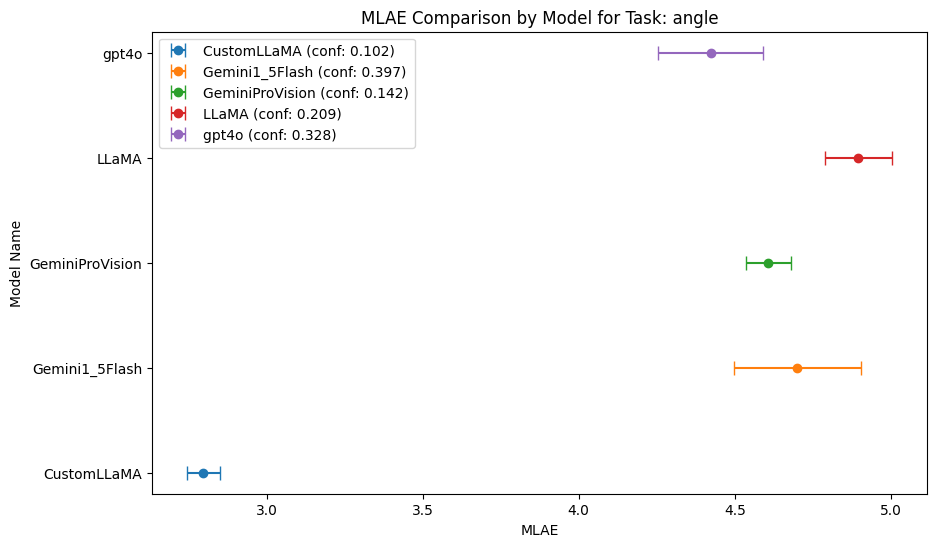

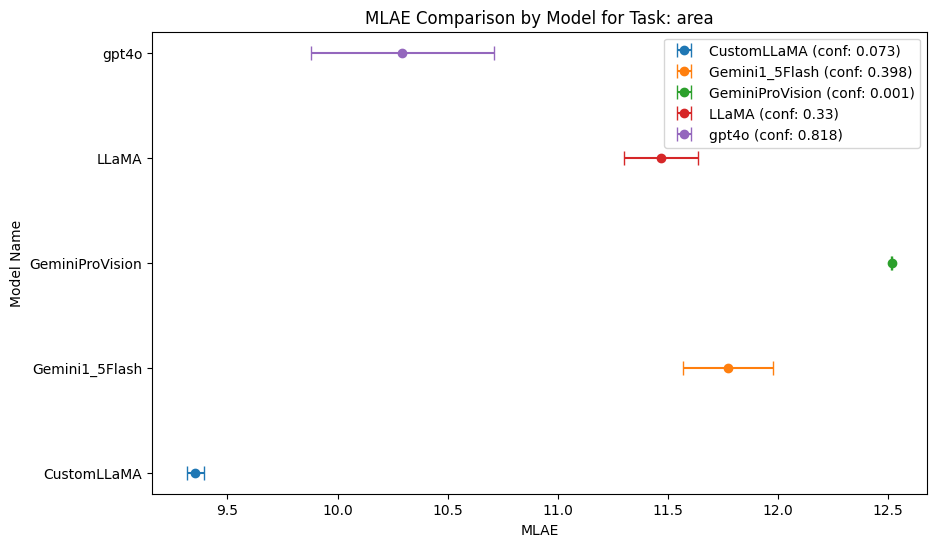

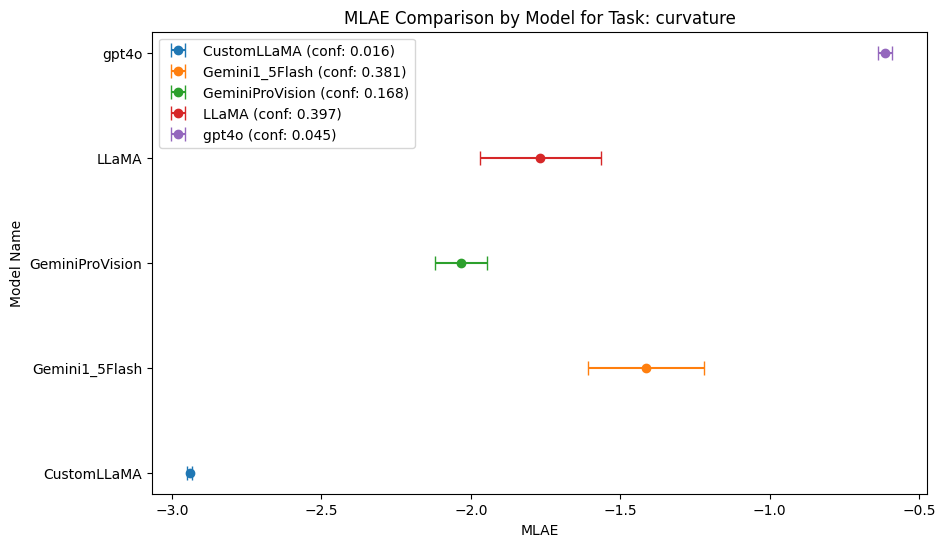

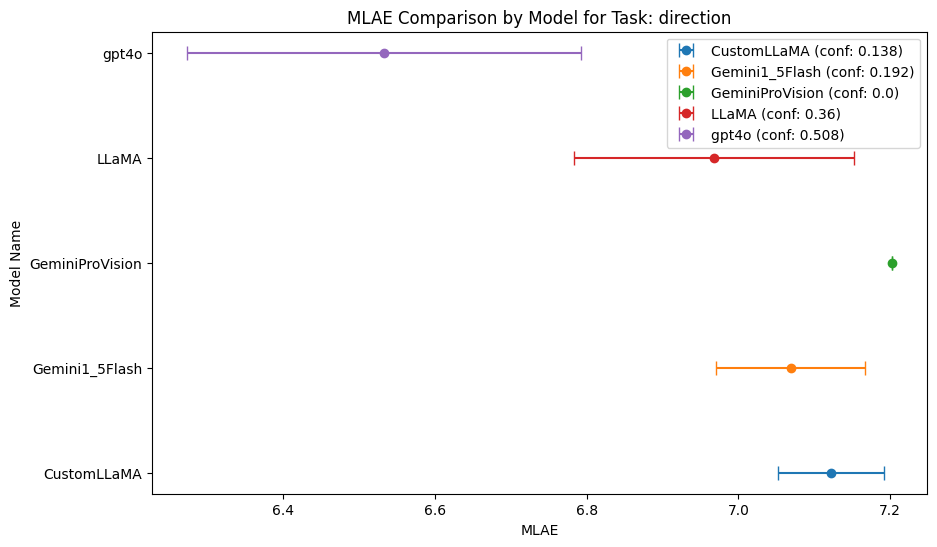

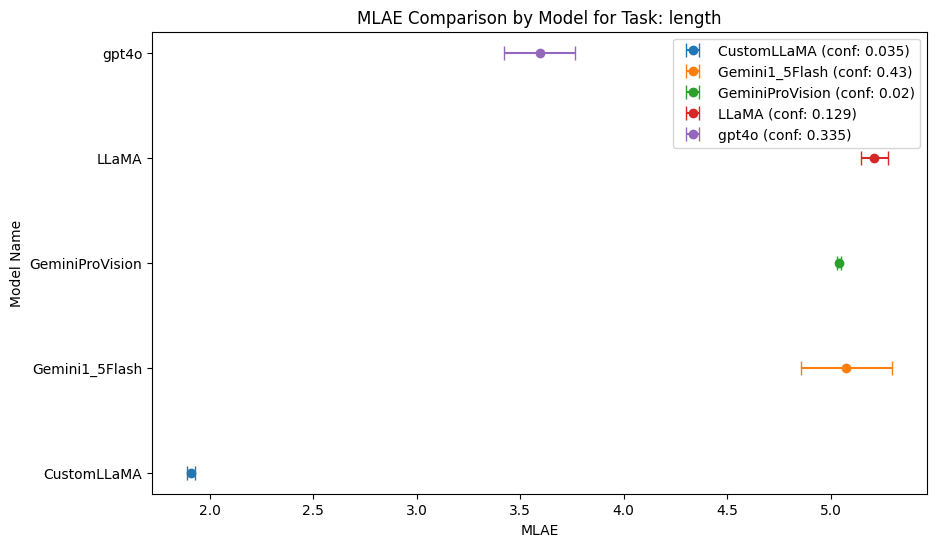

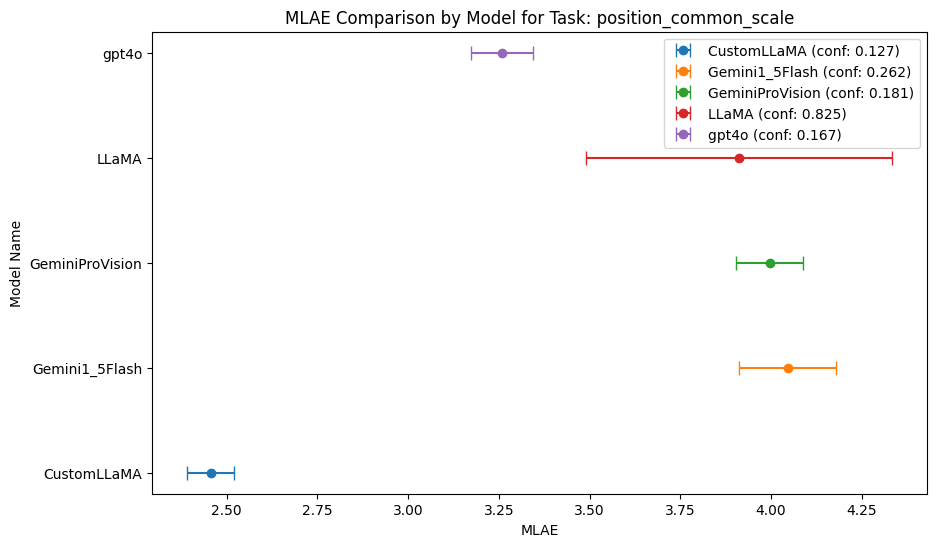

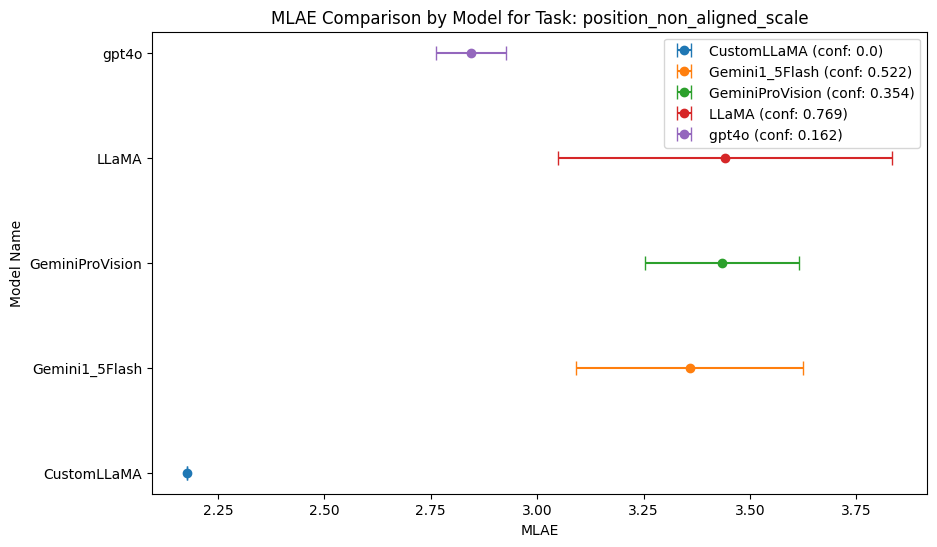

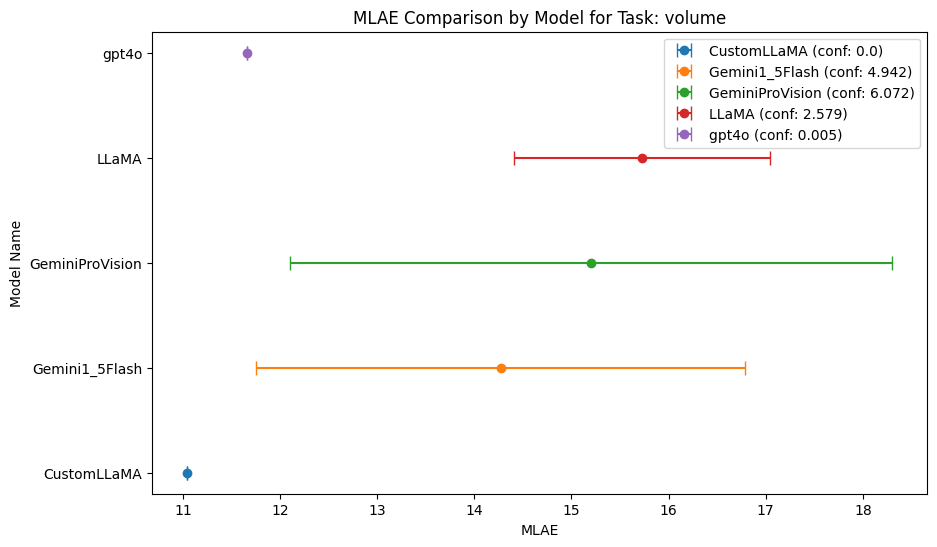

In [93]:
for task_name, task_data in final_summary.groupby('task'):
    plt.figure(figsize=(10, 6))
    
    # Sort model names alphabetically
    sorted_model_names = sorted(task_data['model_name'].unique())
    
    for model_name in sorted_model_names:
        model_data = task_data[task_data['model_name'] == model_name]
        plt.errorbar(model_data['mlae'].values[0], model_name, xerr=model_data['std'].values[0], fmt='o', capsize=5, label=f"{model_name} (conf: {model_data['confidence'].values[0]})")
    
    plt.title(f'MLAE Comparison by Model for Task: {task_name}')
    plt.xlabel('MLAE')
    plt.ylabel('Model Name')
    plt.legend()
    plt.show()

### Comparison of models based on ground truth and parsed answers for all 3 runs

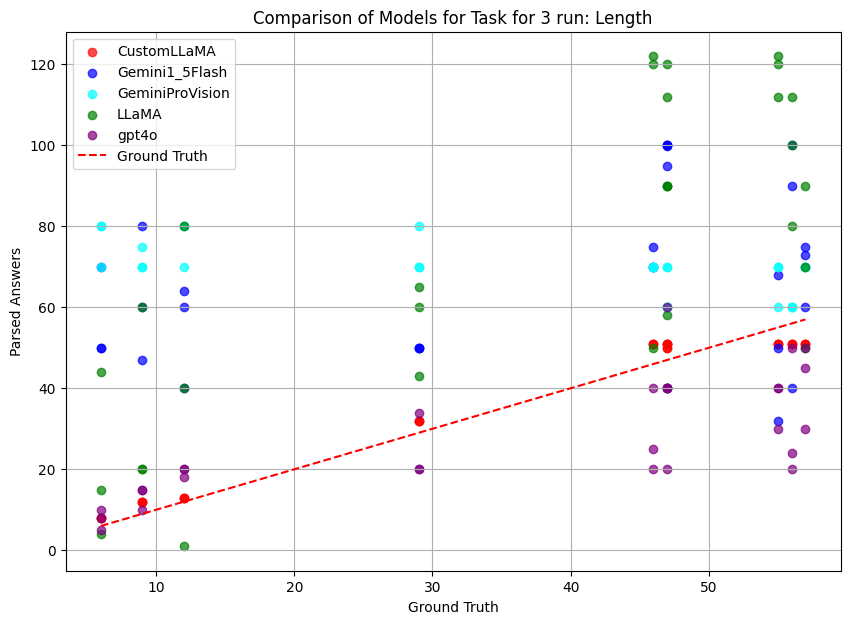

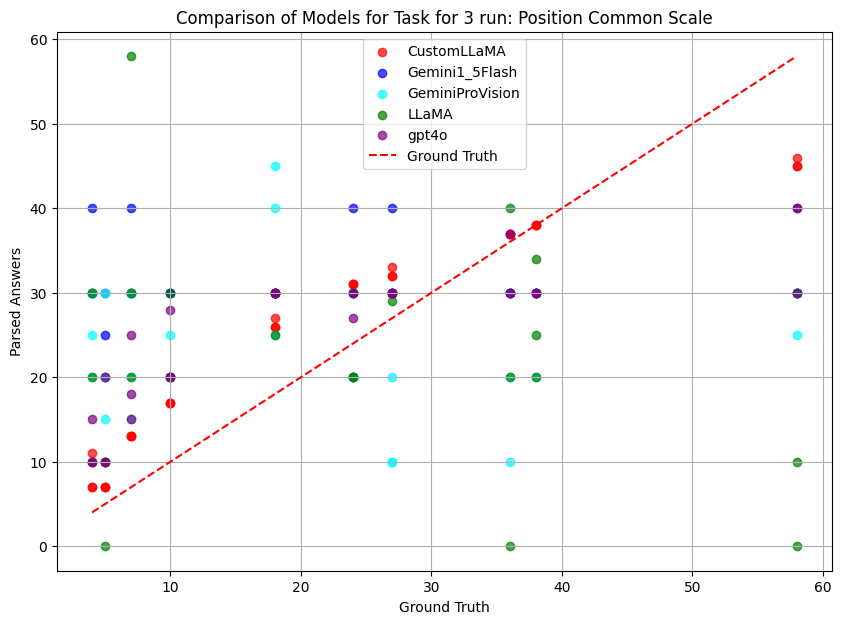

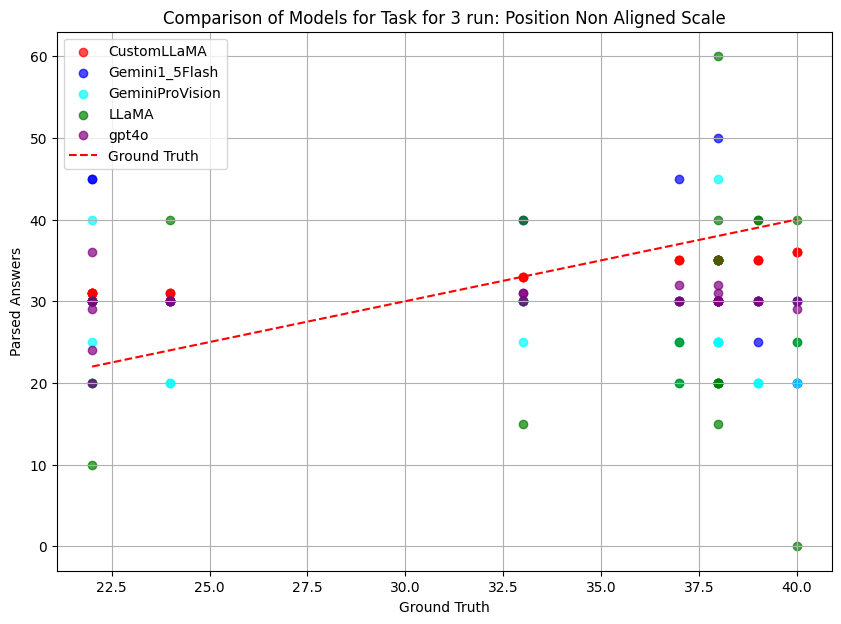

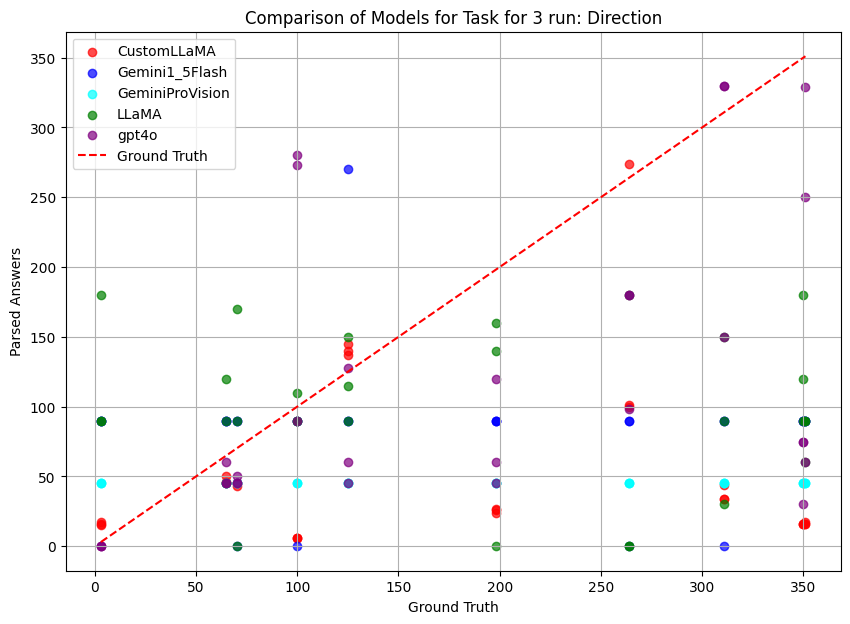

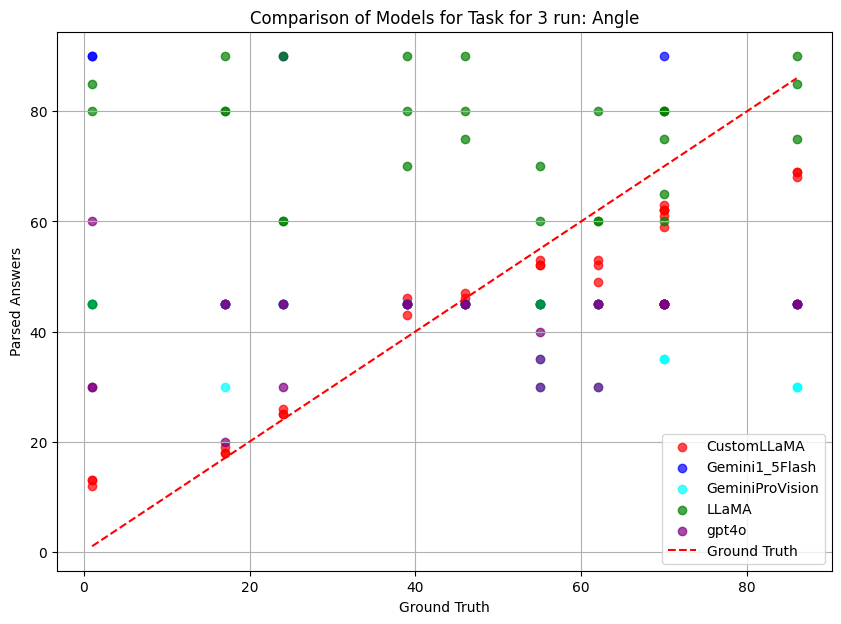

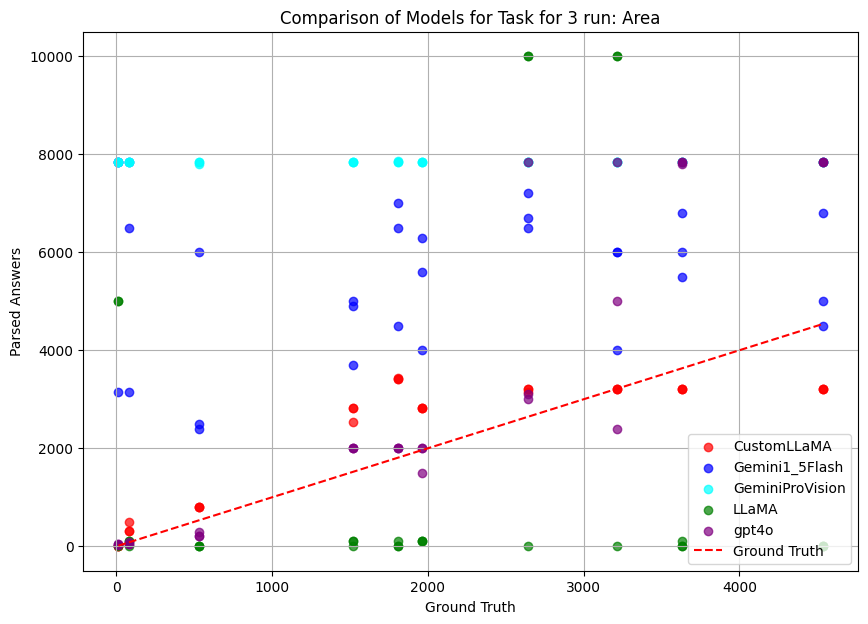

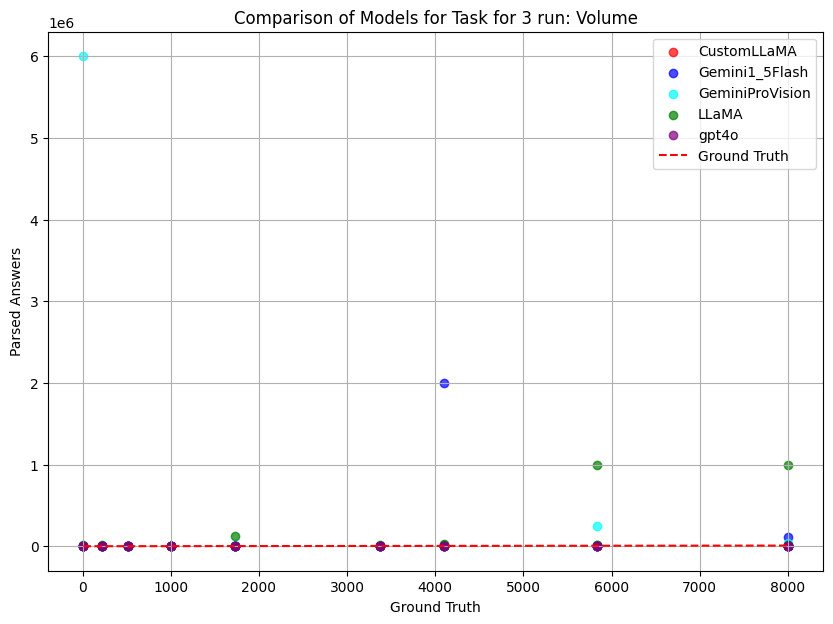

In [92]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ensure parsed_answers is converted to float
all_data['parsed_answers'] = all_data['parsed_answers'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)

tasks_to_plot = [
    'length', 
    'position_common_scale', 
    'position_non_aligned_scale',
    'direction', 
    'angle',
    'area',
    'volume'
]

# Define custom colors for each model
model_colors = {
    'CustomLLaMA': 'red',
    'gpt4o': 'purple',
    'LLaMA': 'green',
    'Gemini1_5Flash': 'blue',
    'GeminiProVision': 'cyan'
}

for task_to_plot in tasks_to_plot:
    task_data = all_data[all_data['task'] == task_to_plot]

    plt.figure(figsize=(10, 7))

    for model_name, model_data in task_data.groupby('model_name'):
        # Ensure ground truth and parsed answers are the same size
        x_values = model_data['ground_truth'].values
        y_values = model_data['parsed_answers'].values

        plt.scatter(x_values, y_values, label=model_name, alpha=0.7, color=model_colors.get(model_name, 'gray'))  # Default to gray if model not found

    plt.xlabel('Ground Truth')
    plt.ylabel('Parsed Answers')
    plt.title(f"Comparison of Models for Task for 3 run: {task_to_plot.replace('_', ' ').title()}")

    min_gt, max_gt = task_data['ground_truth'].min(), task_data['ground_truth'].max()
    plt.plot([min_gt, max_gt], [min_gt, max_gt], 'r--', label='Ground Truth')  # Line for Ground Truth

    plt.legend()
    plt.grid(True)
    plt.show()
